<a href="https://colab.research.google.com/github/timurista/data-analysis/blob/master/TensorflowTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install TensorFlow
!pip install tensorflow==2.0.0-beta1
!pip install matplotlib


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)
print(np.__version__)

2.0.0-beta1
1.16.4


# Initial Start

Python 3 tensorflow example

In [9]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations, 1))
zs = np.random.uniform(-10,10,(observations, 1))

inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations, 1))

targets = 2*xs - 3*zs + 5 + noise

print(inputs.shape, noise.shape)

(1000, 2) (1000, 1)


In [0]:
np.savez('TF_intro', inputs=inputs, targets=targets)

In [0]:
training_data = np.load('TF_intro.npz')

In [27]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

## cusotom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

## sgd is stochastic gradient descent
model.compile(custom_optimizer, loss="mean_squared_error")
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 22.8170
Epoch 2/100
1000/1000 - 0s - loss: 1.4698
Epoch 3/100
1000/1000 - 0s - loss: 0.4385
Epoch 4/100
1000/1000 - 0s - loss: 0.3748
Epoch 5/100
1000/1000 - 0s - loss: 0.3960
Epoch 6/100
1000/1000 - 0s - loss: 0.4134
Epoch 7/100
1000/1000 - 0s - loss: 0.4142
Epoch 8/100
1000/1000 - 0s - loss: 0.3638
Epoch 9/100
1000/1000 - 0s - loss: 0.4030
Epoch 10/100
1000/1000 - 0s - loss: 0.4956
Epoch 11/100
1000/1000 - 0s - loss: 0.4022
Epoch 12/100
1000/1000 - 0s - loss: 0.3674
Epoch 13/100
1000/1000 - 0s - loss: 0.3931
Epoch 14/100
1000/1000 - 0s - loss: 0.4370
Epoch 15/100
1000/1000 - 0s - loss: 0.3896
Epoch 16/100
1000/1000 - 0s - loss: 0.3812
Epoch 17/100
1000/1000 - 0s - loss: 0.4129
Epoch 18/100
1000/1000 - 0s - loss: 0.4536
Epoch 19/100
1000/1000 - 0s - loss: 0.3819
Epoch 20/100
1000/1000 - 0s - loss: 0.3883
Epoch 21/100
1000/1000 - 0s - loss: 0.4072
Epoch 22/100
1000/1000 - 0s - loss: 0.4200
Epoch 23/100
1000/1000 - 0s - loss: 0.37

In [28]:
model.layers[0].get_weights()

[array([[ 2.0229752],
        [-2.9728978]], dtype=float32), array([5.0430207], dtype=float32)]

In [0]:
predicted = model.predict_on_batch(training_data['inputs']).round(1)

In [0]:
actual = training_data['targets'].round(1)

In [0]:
## Plot outputs vs targets

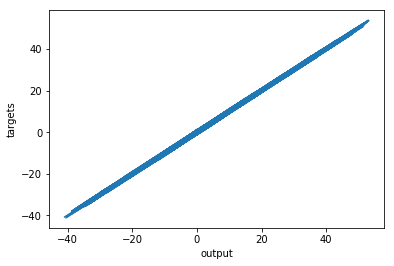

In [32]:
plt.plot(np.squeeze(predicted), np.squeeze(actual))
plt.xlabel('output')
plt.ylabel('targets')
plt.show()